In [41]:
import ase
import json
from ase import Atoms
import numpy as np
from ase.io import read, write
from pymatgen import Structure

from pymatgen.io.ase import AseAtomsAdaptor
from tqdm import tqdm

from polyhedral_analysis.configuration import Configuration
from polyhedral_analysis.octahedral_analysis import *
from polyhedral_analysis.polyhedra_recipe import PolyhedraRecipe

import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["mathtext.fontset"] ='custom'
plt.rcParams['mathtext.rm'] = 'Helvetica'
plt.rcParams['mathtext.it'] = 'Helvetica:italic'
plt.rcParams['mathtext.bf'] = 'Helvetica'
plt.rcParams["font.size"] = "8"
plt.rcParams['axes.linewidth'] = 0.75
plt.rcParams['lines.linewidth'] = 0.75
plt.rcParams['lines.markersize'] = 4

! ls

FIG_S_10_O_environment_breakdown.ipynb
Figure_S10-oxygen_environment_breakdown.png


In [42]:
path = '../../../Data/structure_files'
struc = Structure.from_file(filename=f'{path}/LNMO_pristine_from_CE_MC.cif')
#print(struc)

In [43]:
struc['Na'] = 'Li'
#print(struc)

In [44]:
recipe_O = PolyhedraRecipe( method='distance cutoff', 
                          coordination_cutoff=2.5, 
                          central_atoms='O',
                          vertex_atoms=['Li','Mn','Ni'])

In [45]:
def get_envs(structure):
    config_O = Configuration( structure=structure, recipes=[recipe_O] )

    O_Mn3 = []
    O_Ni3 = []
    O_Mn2Ni = []
    O_Ni2Mn = []
    O_Mn2Li = []
    O_Ni2Li = []
    O_MnNiLi = []

    for p in config_O.polyhedra:
        if p.vertex_labels.count('Mn') == 3:
            O_Mn3.append(p)
        if p.vertex_labels.count('Ni') == 3:
            O_Ni3.append(p)

        if p.vertex_labels.count('Mn') == 2 and p.vertex_labels.count('Ni') == 1:
            O_Mn2Ni.append(p)
        if p.vertex_labels.count('Ni') == 2 and p.vertex_labels.count('Mn') == 1:
            O_Ni2Mn.append(p)

        if p.vertex_labels.count('Mn') == 2 and p.vertex_labels.count('Li') == 4:
            O_Mn2Li.append(p)
        if p.vertex_labels.count('Ni') == 2 and p.vertex_labels.count('Li') == 4:
            O_Ni2Li.append(p)

        if p.vertex_labels.count('Mn') == 1 and p.vertex_labels.count('Li') == 4:
            O_MnNiLi.append(p)
            
    total = len(config_O.polyhedra)

    frac_O_Mn3 = len(O_Mn3) / total * 100
    frac_O_Ni3 = len(O_Ni3) / total * 100

    frac_O_Mn2Ni = len(O_Mn2Ni) / total *100
    frac_O_Ni2Mn = len(O_Ni2Mn) / total *100

    frac_O_Mn2Li = len(O_Mn2Li) / total *100
    frac_O_Ni2Li = len(O_Ni2Li) / total *100

    frac_O_MnNiLi = len(O_MnNiLi) / total *100
    
    print('O-Mn3:',frac_O_Mn3,'atom 1:',O_Mn3[0].central_atom.index)
    print('O-Ni3:',frac_O_Ni3,'atom 1:',O_Ni3[0].central_atom.index,'\n')

    print('O-Mn2Ni:',frac_O_Mn2Ni,'atom 1:',O_Mn2Ni[0].central_atom.index)
    print('O-Ni2Mn:',frac_O_Ni2Mn,'atom 1:',O_Ni2Mn[0].central_atom.index,'\n')

    print('O-Mn2Li:',frac_O_Mn2Li,'atom 1:',O_Mn2Li[0].central_atom.index)
    print('O-Ni2Li:',frac_O_Ni2Li,'atom 1:',O_Ni2Li[0].central_atom.index,'\n')

    print('O-MnNiLi:',frac_O_MnNiLi,'atom 1:',O_MnNiLi[0].central_atom.index)
    
    sites_list = [frac_O_Mn3, frac_O_Ni3, frac_O_Mn2Ni, frac_O_Ni2Mn, 
              frac_O_Mn2Li, frac_O_Ni2Li, frac_O_MnNiLi ]
    
    return sites_list

In [46]:
sites_list  = get_envs(struc)

O-Mn3: 5.642361111111112 atom 1: 3464
O-Ni3: 0.5787037037037037 atom 1: 3580 

O-Mn2Ni: 40.10416666666667 atom 1: 3456
O-Ni2Mn: 3.674768518518518 atom 1: 3488 

O-Mn2Li: 49.21875 atom 1: 3507
O-Ni2Li: 0.028935185185185182 atom 1: 3668 

O-MnNiLi: 0.7523148148148148 atom 1: 3552


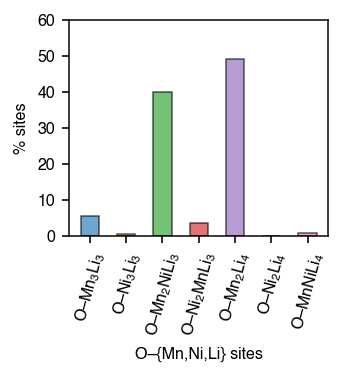

In [47]:


fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(2.0, 1.5))

a = axes

O_bar_colors = ['tab:blue',
              'tab:orange',
              'tab:green',
              'tab:red', 
              'tab:purple',
              'tab:brown',
              'tab:pink']

x = ['O–Mn$_3$Li$_3$','O–Ni$_3$Li$_3$',
     'O–Mn$_2$NiLi$_3$','O–Ni$_2$MnLi$_3$',
     'O–Mn$_2$Li$_4$','O–Ni$_2$Li$_4$','O–MnNiLi$_4$']

N= len(x)
ind = np.arange(N) 
width = 0.5
linewidth = 0.75

a.bar(ind , sites_list , width, color=O_bar_colors, 
      alpha=0.65, edgecolor='k', linewidth = linewidth)

a.set_xticks(ind)

a.set_xticklabels(x, rotation = 75)

left_axes = [a]
for axis in left_axes:
    axis.set_yticks([])
    axis.set_ylabel('% sites')
    axis.set_yticks([0,10,20,30,40,50,60])
    
a.set_xlabel('O–{Mn,Ni,Li} sites')
    

fig.subplots_adjust(bottom=0.0, top=1.0, left=0.0, right=0.9,
                    wspace=0.2, hspace=0.075)

plt.savefig('Figure_S10-oxygen_environment_breakdown.png', dpi=300, bbox_inches='tight')
